In [84]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This project is based on information from [CIA World Book](https://www.cia.gov/library/publications/the-world-factbook/). This dataset contains statistics about all the countries on Earth. Columns that are in:
- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area- The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.

In [85]:
connection = sql.connect('factbook.db')

In [86]:
query = '''SELECT * FROM sqlite_master'''
pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [87]:
query = '''SELECT * FROM sqlite_master WHERE type="table"'''
pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [88]:
query = '''SELECT * FROM sqlite_master'''
pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [89]:
query = '''SELECT * FROM facts LIMIT 5'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


SQL query that return:
- Minimum population
- Maximum population
- Minimum population growth
- Maximum population growth

In [90]:
query = '''SELECT 
                MIN(population), MAX(population), 
                MIN(population_growth), MAX(population_growth) 
            FROM facts'''
pd.read_sql_query(query, connection)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


#### Those are surprising results so I need to check are these correct

In [91]:
query = '''SELECT * FROM facts
            WHERE population == 0'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [92]:
query = '''SELECT * FROM facts
            WHERE population_growth == 0'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,190,vt,Holy See (Vatican City),0,0,0.0,842,0.0,NaN,NaN,NaN,2015-11-01 13:35:32.774433,2015-11-01 13:35:32.774433
1,200,ck,Cocos (Keeling) Islands,14,14,0.0,596,0.0,NaN,NaN,NaN,2015-11-01 13:36:12.949429,2015-11-01 13:36:12.949429
2,207,gl,Greenland,2166086,2166086,NaN,57733,0.0,14.48,8.49,5.98,2015-11-01 13:36:35.145214,2015-11-01 13:36:35.145214
3,238,pc,Pitcairn Islands,47,47,0.0,48,0.0,NaN,NaN,NaN,2015-11-01 13:38:08.047849,2015-11-01 13:38:08.047849


In [93]:
query = '''SELECT * FROM facts
            WHERE population == 7256490011'''
pd.read_sql_query(query, connection)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [94]:
query = '''SELECT 
                population, population_growth, birth_rate, death_rate 
            FROM facts
            WHERE 
                population != (select MAX(population) from facts) and
                population != (select MIN(population) from facts)'''
pd.read_sql_query(query, connection)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
...,...,...,...,...
235,3598357,0.60,10.86,8.67
236,103574,0.59,10.31,8.54
237,1869055,2.81,31.11,3.04
238,2785366,1.95,22.99,3.50


ProgrammingError: Cannot operate on a closed database.

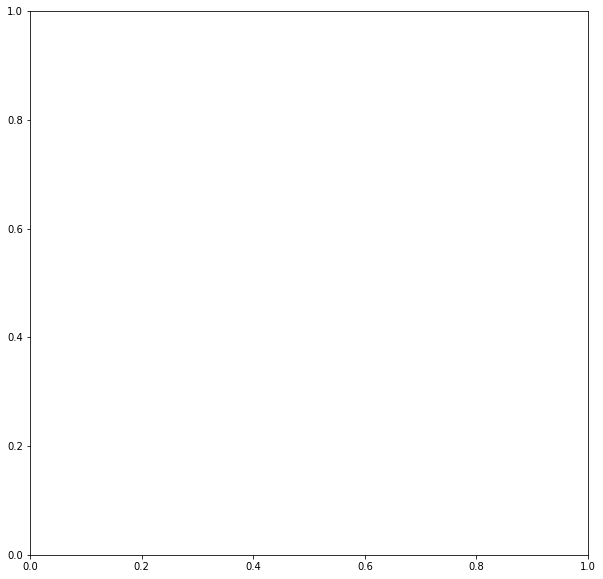

In [103]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(query, connection).hist(ax=ax)

#### Which countries have the highest population density?

In [96]:
query = '''SELECT 
                name, CAST(population as float)/CAST(area as float) density
            FROM facts
            ORDER BY density DESC'''
pd.read_sql_query(query, connection).head(10)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014D0EF28>]],
      dtype=object)

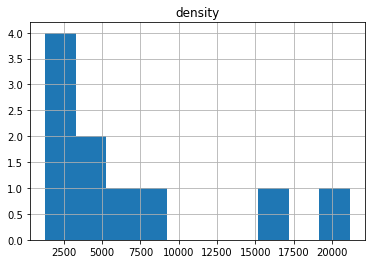

In [97]:
pd.read_sql_query(query, connection).head(10).hist()

#### Which countries have the highest ratios of water to land? 

In [98]:
query = '''SELECT 
                name, CAST(area_water as float)/CAST(area_land as float) ratio
            FROM facts
            ORDER BY ratio DESC'''
pd.read_sql_query(query, connection).head(10)

,name,ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [99]:
query = '''SELECT * FROM facts
            WHERE name == "British Indian Ocean Territory"'''
pd.read_sql_query(query, connection).head(10)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,228,io,British Indian Ocean Territory,54400,60,54340,None,None,None,None,None,2015-11-01 13:37:35.922896,2015-11-01 13:37:35.922896


#### Which countries have more water than land?

In [100]:
query = '''SELECT 
                name, area_water, area_land
            FROM facts
            WHERE area_water > area_land'''
pd.read_sql_query(query, connection)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346


In [101]:
connection.close()